# Git

## Introducción

Git es un software de control de versiones creado por Linus Torvalds, quien lo creó para poder tener un buen control de versiones cuando desarrolló el kernel de Linux.

## Las áreas de git

Git tiene tres áreas, aunque también se puede considerar una cuarta.

![git states](https://maximofn.com/wp-content/uploads/2023/03/git-states.png)

 * La primera es nuestro espacio de trabajo, en ella es donde tenemos todo nuestro código. Aquí cuando modificamos o creamos un archivo este pasa a estar como no trackeado, por lo que tenemos que pasarlo al área de `staged`
 * La segunda área es la de `staged`. Aquí los archivos que habíamos modificado o creado y que estaban no trackeados pasan a estar trackeados, es decir, git les hace un seguimiento. Aquí mandaremos los archivos al siguiente área de `head`
 * La tercera área es la de `head`. En ella hemos grabado una versión de nuestro código. De esta manera, grabando versiones podemos volver a versiones pasadas si es necesaro. La versión grabada de nuestro código puede ser mandada a un servidor de manera que sea accesible por varias personas
 * Las tres áreas anteriores corresponden al trabajo en local, pero hay una área más y y es la de `remote server`. Aquí lo que hacemos es mandar la versión grabada de nuestro código a un servidor de manera que tengamos acceso al código desde cualquier lugar, o que tenga acceso más personas

Para hacer un simil, es como un escenario en el que vas a hacer una foto. Primero tienes tus archivos modificados, de manera que los que quieres inmortalizar los mandas al área de `staged`, es decir al escenario. En el momento que has mandado todos los archivos que consideras, haces la foto, por lo que mandas todos los archivos al área de `head`. De esta manera, puedes ir haciendo muchas fotos, según va evolucionando el código, de manera que puedes tener en un álbun de fotos la evolución del código. Por último puedes subir esa foto a una servidor para que sea accesible por más gente, es decir, los mandas al área de `remote server`

## Instalar git

En la mayoría de distribuciones Linux git ya viene instalado, podemos comprobarlo haciendo `git --version`

In [1]:
!git --version

git version 2.25.1


Si no lo tienes o quieres actualizar la versión de git solo tienes que ejecutar `sudo apt update` y a continuación `sudo apt install git`

In [3]:
!sudo apt update && sudo apt install git

[sudo] password for maximo.fernandez@AEROESPACIAL.SENER: 


Volvemos a comprobar la versión

In [4]:
!git --version

git version 2.25.1


En mi caso ya tenía la última versión

## Configuración inicial

### Configuración del nombre y el correo

Antes de empezar a usar git es conveniente que hagas unas configuraciones mínimas como el nombre de usuario y el correo, esta información es la que saldrá a la hora de mostrar quien ha hecho cambios en el código. Para hacer esto hay que ejecutar


```bash
git config --global user.name "<nombre de usuario>"
git config --global user.email "<email>"
```

En mi caso metería

```bash
git config --global user.name "MaximoFN"
git config --global user.email "maximofn@gmail.com
```

Como se puede ver el flag `--global` lo que hace es cambiar la configuración global de git, pero si en un repositorio en concreto tienes que poner otros datos, simplemente navegas hasta el repositorio y quita el flag `--global` de los comandos anteriores

```bash
git config user.name "<nombre de usuario>"
git config user.email "<email>"
```

### Configurar el editor por defecto

Cuando más adelante expliquemos qué son los `commit`s veremos que en una de las opciones se nos puede abrir un navegador. Por defecto git intentará usar `vim`, pero dado que no es un editor muy sencillo de usar podemos modificarlo, a continuación se muestra cómo hacerlo con algunos editores comunes

```bash
git config --global core.editor "code"  # vscode como editor
git config --global core.editor "atom"  # Atom como editor
git config --global core.editor "subl"  # Sublime text como editor
git config --global core.editor "nano"  # Nano como editor
```

### Comprobar configuración de git

Para revisar la configuración de git podemos usar `git config --lits`

In [6]:
!git config --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


Podemos usar los flags `--global`, `--local` y `--system` para ver solo la configuración global, local (si existe) y de sistema (si existe)

In [8]:
!git config --global --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true


In [9]:
!git config --local --list

core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


In [10]:
!git config --system --list

fatal: unable to read config file '/etc/gitconfig': No such file or directory


En mi caso no existe configuración de sistema

Si solo se quiere saber el valor de un parámetro de la configuración valdría con introducir `git config <parameter>`

In [15]:
!git config user.name

maximofn


## Control de versiones de manera local

### Inicializar un nuevo repositorio (`git init`)

Hay dos maneras de inicializar un nuevo repositorio haciendo
 * Una es haciendo `git init <nombre repositorio>`. Esto creará una nueva carpeta con el nombre del repositorio
 * Otra es navegando a la carpeta donde queramos crear un repositorio y haciendo `git init`

Voy a crear un nuevo repositorio

In [3]:
!git init notebook_git

Inicializado repositorio Git vacío en /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/


Si ahora hacemos `ls` veremos que se ha creado una nueva carpeta llamada `notebook_git`

In [17]:
!ls | grep notebook_git

notebook_git


Nos movemos a ella

In [18]:
!cd notebook_git

Ahora dentro de la carpeta tenemos dos maneras de saber que se ha creado el repositorio, una haciendo `ls -a` que mostará todos los archivos y veremos que hay una carpeta llamada `.git`. La otra manera es haciendo `git status` que nos dirá el estado del repositorio

In [20]:
!cd notebook_git && ls -a

.  ..  .git


In [21]:
!cd notebook_git && git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


Como estamos en un notebook, cada celda tiene su `path` en el `path` del notebook, por eso las dos veces he tenido que hacer `cd notebook_git &&`, para que cambie a la carpeta con el repositorio que acabamos de crear.

Si ahora pruebo `git status` en otro `path` donde no se haya inicializado un repositorio nos dará un error

In [23]:
!cd ~/ && git status

fatal: not a git repository (or any of the parent directories): .git


### Crear nuevos archivos

En el momento que hemos inicializado un repositorio podemos empezar a crear nuevos archivos, así que creamos uno y vemos qué ocurre

In [5]:
!cd notebook_git && echo "print('Hello World')" > hello.py

Si ahora volvemos a hacer `git status` vemos qué nos aparece

In [6]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hello.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Como se puede ver ahora nos está diciendo que el archivo `hello.py` no tiene seguimiento. Es decir tenemos que añadir `hello.py` al área de `staged`, que recordemos era como el escenario donde íbamos a poner todo lo que más tarde le haremos una foto

### Deshacer la creación de un archivo nuevo

En este caso, como son archivos que git aun no está siguiendo, es decir, que aun no están en el área de `staged` tendríamos tres maneras de hacerlo

 * Borrándolo simplemente: Como git aun no sigue el archivo podríamos hacer `rm hello.py` y listo
 * Borrándolo mediante un comando de git: Antes hemos borrado con `rm` pero es posible que estés en un sistema que no tenga el comando `rm` por lo que en ese caso se puede usar el comando de git `git rm hello.py`
 * Por último podemos usar `git clean`. Este es útil por ejemplo cuando hay muchos archivos nuevos, y así en un solo comando eliminamos todos

#### `git clean`

Si ejecutamos `git clean` a secas nos dará un error

In [2]:
!cd notebook_git && git clean

fatal: clean.requireForce default en true y ninguno de -i, -n, ni -f entregado; rehusando el clean


Nos está diciendo que hace falta añadir uno de estos flags `-n`, `-i` y `-f`. Además vamos a ver el flag `-d`

 * `-n` (dry run): Nos dirá qué archivos se van a borrar, pero no los borrará
 * `-i`: Nos preguntará por cada archivo que se va a borrar
 * `-f`: Forzará el borrado de los archivos
 * `-d`: También borrará carpetas

Vamos a probarlo, primero hacemos `git clean -n` para saber qué archivos se borrarían

In [4]:
!cd notebook_git && git clean -n

Será borrado hello.py


Ahora hacemos `git clean -f` para que lo borre, ya que estamos de acuerdo en que lo borre

In [5]:
!cd notebook_git && git clean -f

Borrando hello.py


Como vemos ha borrado `hello.py`

### Añadir un archivo al área de staged (`git add`)

Volvemos a crear un archivo

In [6]:
!cd notebook_git && echo "print('Hola mundo')" > hola.py

Volvemos a hacer un `git status` para comprobar que tenemos el archivo

In [7]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hola.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Vemos que tenemos el archivo `hola.py` pero que git no le está haciendo un seguimiento. Además vemos que nos ayuda y nos dice `usa "git add" para hacerles seguimiento`

La sintaxis es la siguiente `git add <archivo>`, pero podemos hacerlo de varias maneras

 * Si queremos añadir más de un archivo lo podemos hacer poniendo todos los archivos que queremos añadir al área de staged, separados por un espacio: `git add <archivo1> <archivo2> <archivo3>`
 * Si queremos añadir todos los archivos de un mismo formato, por ejemplo, si queremos añadir todos los archivos de python sería `git add *.py`
 * Si queremos añadir todos los archivos de una carpeta `git add <folder>/`
 * Si queremos añadir todos los archivos tenemos tres maneras, `git add --all`, `git add -A` o `git add .`

Vamos a añadir el nuevo archivo creado

In [8]:
!cd notebook_git && git add hola.py

Hacemos un `git status` para ver qué ha pasado

In [9]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



Como vemos nos dice que tenemos un nuevo archivo al que le hace seguimiento y que está pendiente de ser confirmado `hola.py`

### Sacar un archivo del área de staged (`git reset`)

En caso de que añadamos un archivo al área de staged y lo queramos sacar tenemos que usar `git reset <archivo>`, vamos a verlo

Creamos y añadimos al área de staged un nuevo archivo

In [10]:
!cd notebook_git && echo "print('Este no')" > adios.py && git add adios.py

Hacemos `git status` para comprobar que está en el área de staged

In [11]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: adios.py
	nuevos archivos: hola.py



Como vemos están `hola.py` y `adios.py`, así que usamos `git reset adios.py` para sacarlo del área de staged

In [12]:
!cd notebook_git && git reset adios.py

Hacemos un `git status` para comprobar que ha salido

In [13]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	adios.py



Podemos ver que `adios.py` ya no tiene seguimiento por parte de git, lo ha sacado del área de staged

Hacemos `git clean -f` para borrarlo

In [14]:
!cd notebook_git && git clean -f && git status

Borrando adios.py
En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



### Commit (`git commit`)

Si volvemos al simil en el que digimos que el área de staged era el escenario donde mandábamos los archivos a los que queríamos hacerles la foto, ahora toca hacer la foto para inmortalizar el estado actual. Esto es hacer un `commit`

De esta manera se registra el estado actual del código, así con cada commit, se irá teniendo un registro de la evolución del código. Al igual que con un album de fotos, con cada foto vamos teniendo un registro de la evolución de lo que ponemos en el escenario.

Como a la hora de hacer el commit se está registrando el cambio del código, git no nos deja hacer el commit si no hacemos un mínimo comentario. Por lo que hay dos maneras de hacer commit

 * `git commit` de esta manera se abrirá el editor que hayamos establecido en la configuración de git. Si no hemos configurado un editor por defecto, se abrirá `vi`. Si queremos cambiar la configuración del editor podemos hacer por ejemplo `git config --global core.editor "code"` o `git config core.editor "code"` para establecer vscode como el editor por defecto de manera global o local.
 * `git commit -m "Mensaje de commit"`. De esta manera añadimos el mensaje directamente

Al hacer el commit de la primera forma podemos tener una primera línea que será el título del commit y varias líneas más donde se explica en más detalle. Si queremos poder hacer esto con el flag `-m` bastará con añadir varios flags `-m` seguidos: `git commit -m "Titulo del commit" -m "Primera linea explicando más" -m "Segunda linea explicando más"`

Una vez hemos hecho el commit, esto guardará un registro del cambio de nuestro repositorio de manera local. Aun no hemos conectado con un servidor remoto

Vamos a probar a hacer el commit

In [15]:
!cd notebook_git && git commit -m "Primer commit, hola.py"

[master (commit-raíz) 8e24598] Primer commit, hola.py
 1 file changed, 1 insertion(+)
 create mode 100644 hola.py


Hacemos un `git status`

In [16]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Vemos que nos dice que no hay nada nuevo, tenemos todo nuestro repositorio totalmente controlado

#### Commit saltandonos add (`git commit -a -m` o `git commit -am`)

En el caso en el que todos los archivos que hayamos modificados los queramos llevar al área de staged y luego hacerles un commit, podemos hacer todo esto en un solo paso mediante `git commit -a -m "mensaje"`, `git commit --all -m "mensaje"` o `git commit -am "mensaje"`

 > Nota: Esto solo es válido si se modifica un archivo. Si el archivo es nuevo y git no le hace seguimiento, esto no es válido

Veamos un ejemplo, vamos a modificar `hola.py`

In [1]:
!cd notebook_git && echo "print('He añadido una nueva linea')" >> hola.py

Vamos a hacer un `git status` para asegurarnos

In [2]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Podemos ver que en la propia ayuda de git ya nos sugiere usar `git commit -a`, asçi que vamos a hacerlo

In [3]:
!cd notebook_git && git commit -am "Segundo commit, hola.py"

[master 1d3a290] Segundo commit, hola.py
 1 file changed, 1 insertion(+)


Volvemos a hacer un `git status`

In [4]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


No hay nada para hacer commit, ya se ha hecho el comit del cambio

### Histórico de cambios (`git log`)

Con git podemos ver el historial de todos los cambios que hemos ido commiteando, para ello usamos `git log`. Es como si nos pusiéramos a revisar nuestro album de fotos

In [5]:
!cd notebook_git && git log

commit 1d3a29075d83ae4c2ed763596b817a91a458535b (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author: maximofn <maximofn@gmail.com>
Date:   Wed Mar 29 15:56:27 2023 +0200

    Primer commit, hola.py


Podemos ver el historial de cambios, hay que leerlo de abajo arriba.

Primero vemos el commit con mensaje `Primer commit, hola.py`, podemos ver la fecha, el autor y el hash, que es su identificador único

A continuación vemos el segundo commit con mensaje `Segundo commit, hola.py`, con su fecha, autor y hash. Además nos muestra dónde está el `HEAD` y en qué rama estamos

Más adelante hablaremos sobre las ramas, pero ahora vamos a ver qué es el `HEAD`

### HEAD

Mientras desarrollábamos hemos podido hacer cambios y commitearlos, es decir, hemos ido rellenando el album de fotos de nuestro código. `HEAD` es la posición en el album en la que estamos.

Normalmente es la última posición de todos los commits.

Si queremos saber en qué punto estamos lo podemos hacer mediante `git rev-parse HEAD`

In [2]:
!cd notebook_git && git rev-parse HEAD

1d3a29075d83ae4c2ed763596b817a91a458535b


Como se puede ver, el hash obtenido coincide con el último obtenido al hacer `git log`

In [3]:
!cd notebook_git && git log

commit 1d3a29075d83ae4c2ed763596b817a91a458535b (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author: maximofn <maximofn@gmail.com>
Date:   Wed Mar 29 15:56:27 2023 +0200

    Primer commit, hola.py


### Modificar un commit (`git commit --amend`)

Puede que queramos modificar un commit, porque queramos cambiar el mensaje, o porque queramos añadir más archivos al commit, de modo que veremos los dos casos

#### Modificar el mensaje de commit 

Si solo se quiere modificar el mensaje, lo que tenemos que hacer es `git commit --amend -m "Nuevo mensaje"`, veamos un ejemplo vamos a modificar `hola.py`

In [1]:
!cd notebook_git && echo "print('Esta es la tercera linea')" >> hola.py

Hacemos un `git status`

In [2]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Efectivamente vemos que `hola.py` tiene modificaciones, de modo que hacemos un commit con estas modificaciones

In [3]:
!cd notebook_git && git commit -am "Tercer commot, hola.py"

[master 3866eec] Tercer commot, hola.py
 1 file changed, 1 insertion(+)


Vamos a ver el historial de commits

In [4]:
!cd notebook_git && git log

commit 3866eecc5521fc81a0994650cfd71b43f3a29cfa (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commot, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author: maximofn <maximofn@gmail.com>
Date:   Wed Mar 29 15:56:27 2023 +0200

    Primer commit, hola.py


**Oh no!** hemos escrito `commot` en vez de `commit`, así que vamos a modificar el mensaje

In [5]:
!cd notebook_git && git commit --amend -m "Tercer commit, hola.py"

[master 851af58] Tercer commit, hola.py
 Date: Sat Apr 1 02:16:39 2023 +0200
 1 file changed, 1 insertion(+)


Volvemos a ver el hostorial

In [6]:
!cd notebook_git && git log

commit 851af581ea5246ad480456f82b451d6382074844 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commit, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author: maximofn <maximofn@gmail.com>
Date:   Wed Mar 29 15:56:27 2023 +0200

    Primer commit, hola.py


Vemos que ahora está bien

#### Añadir archivos al último commit

Supongamos que se nos ha olvidad añadir un archivo al último commit, simplemente hacemos un `git add` con ese archivo y hacemos `git commit --amend -m "mensaje"`

Vamos a crear dos archivos nuevos

In [8]:
!cd notebook_git && echo "print('Este es el archivo 1')" > archivo1.py

In [9]:
!cd notebook_git && echo "print('Este es el archivo 2')" > archivo2.py

Ahora hacemos commit solo de uno

In [12]:
!cd notebook_git && git add archivo1.py && git commit -m "Commit con el archivo 1"

[master b87bd0f] Commit con el archivo 1
 1 file changed, 1 insertion(+)
 create mode 100644 archivo1.py


In [13]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo2.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [14]:
!cd notebook_git && git log

commit b87bd0f33f8a4abbd1c4222d83cf00fe6a99c6ea (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:24:10 2023 +0200

    Commit con el archivo 1

commit 851af581ea5246ad480456f82b451d6382074844
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commit, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author: maximofn <maximofn@gmail.com>
Date:   Wed Mar 29 15:56:27 2023 +0200

    Primer commit, hola.py


Como vemos nos hemos dejado el archivo 2, de modo que modificamos el commit y añadimos el archivo 2

In [15]:
!cd notebook_git && git add archivo2.py

In [16]:
!cd notebook_git && git commit --amend -m "Commit con los archivos 1 y 2"

[master f8615d2] Commit con los archivos 1 y 2
 Date: Sat Apr 1 02:24:10 2023 +0200
 2 files changed, 2 insertions(+)
 create mode 100644 archivo1.py
 create mode 100644 archivo2.py


In [17]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


In [18]:
!cd notebook_git && git log

commit f8615d223386f95cefb2a8cab2c881e5f72ed087 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:24:10 2023 +0200

    Commit con los archivos 1 y 2

commit 851af581ea5246ad480456f82b451d6382074844
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commit, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author: maximofn <maximofn@gmail.com>
Date:   Wed Mar 29 15:56:27 2023 +0200

    Primer commit, hola.py


Ahora el último commit tiene los dos nuevos archivos

### Deshacer un commit (`git reset HEAD~1`)

Con este comando le decimos a git que retroceda una posición en el historial de commits. Hay dos opciones `--soft` que no borrará los cambios que hayamos hecho y `--hard` que sí lo hará

#### Deshacer un commit manteniendo los cambios (`git reset --soft HEAD~1`)

Vamos a crear un nuevo archivo

In [19]:
!cd notebook_git && echo "print('Este es el archivo 3')" > archivo3.py

Hacemos un `git status`

In [20]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo3.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Hacemos un commit añadiendo este archivo

In [22]:
!cd notebook_git && git add archivo3.py && git commit -m "Commit con el archivos 3"

[master 59fb0af] Commit con el archivos 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


In [23]:
!cd notebook_git && git log

commit 59fb0af5893982bec7051cbfa42fcb4ec93491b9 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:39:39 2023 +0200

    Commit con el archivos 3

commit f8615d223386f95cefb2a8cab2c881e5f72ed087
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:24:10 2023 +0200

    Commit con los archivos 1 y 2

commit 851af581ea5246ad480456f82b451d6382074844
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commit, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author: maximofn <maximofn@gmail.com>
Date:   Wed Mar 29 15:56:27 2023 +0200

    Primer commit, hola.py


Vemos que en el último commit se encuentra `archivo3.py`, vamos a eliminar el commit manteniendo `archivo3.py`

In [24]:
!cd notebook_git && git reset --soft HEAD~1

Hacemos ahora un `git log` para ver si se ha eliminado el último commit

In [25]:
!cd notebook_git && git log

commit f8615d223386f95cefb2a8cab2c881e5f72ed087 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:24:10 2023 +0200

    Commit con los archivos 1 y 2

commit 851af581ea5246ad480456f82b451d6382074844
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commit, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author: maximofn <maximofn@gmail.com>
Date:   Wed Mar 29 15:56:27 2023 +0200

    Primer commit, hola.py


Efectivamente vemos que se ha eliminado el último commit

Hacemos un `git status` para ver si se ha conservado `archivo3.py`

In [26]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



Se ha mantenido

#### Deshacer un commit descartando los cambios (`git reset --hard HEAD~1`)

Tenemos `archivo3.py` que lo hemos creado y lo tenemos en el área de staged

In [27]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



Por lo que hacemos un commit

In [28]:
!cd notebook_git && git commit -m "Commit con el archivo 3"

[master f42d74a] Commit con el archivo 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


Hacemos un `git log` para comprobar que hay un commit con este archivo

In [29]:
!cd notebook_git && git log

commit f42d74af538548d8c1010a72538b23d2973c9009 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:44:43 2023 +0200

    Commit con el archivo 3

commit f8615d223386f95cefb2a8cab2c881e5f72ed087
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:24:10 2023 +0200

    Commit con los archivos 1 y 2

commit 851af581ea5246ad480456f82b451d6382074844
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commit, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author: maximofn <maximofn@gmail.com>
Date:   Wed Mar 29 15:56:27 2023 +0200

    Primer commit, hola.py


Efectivamente hay un commit añadiendo `archivo3.py`. Ahora eliminamos este commit descartando `archivo3.py`

In [30]:
!cd notebook_git && git reset --hard HEAD~1

HEAD está ahora en f8615d2 Commit con los archivos 1 y 2


Hacemos un `git log` para comprobar que se ha eliminado el último commit

In [31]:
!cd notebook_git && git log

commit f8615d223386f95cefb2a8cab2c881e5f72ed087 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:24:10 2023 +0200

    Commit con los archivos 1 y 2

commit 851af581ea5246ad480456f82b451d6382074844
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commit, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author: maximofn <maximofn@gmail.com>
Date:   Wed Mar 29 15:56:27 2023 +0200

    Primer commit, hola.py


Se ha eliminado el commit con `archivo3.py`, ahora hacemos un `git status` para comprobar qué ha pasado con `archivo3.py`

In [32]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


No aparece `archivo3.py` como un archivo al que haya que hacer commit, vamos a ver si efectivamente se ha eliminado del todo

In [33]:
!cd notebook_git && ls | grep archivo3

Efectivamente se ha eliminado `archivo3.py` del sistema de ficheros

### Ignorar archivos (`.gitignore`)

Supongamos que tenemos un archivo con `API key`s, este archivo en realidad no queremos que se guarde en el repositorio, porque si luego compartimos este repositorio, cualquiera tendría acceso a estas claves, por lo que hay que decirle a git que no haga seguimiento de este archivo

Esto se hace con el archivo `.gitignore`, en el se añade la ruta de los archivos o directorios que no queremos que git haga seguimiento

Vamos a verlo

Creamos el archivo con las claves

In [34]:
!cd notebook_git && touch api_keys.py

Si hacemos `git status` vemos que git lo contempla

In [35]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	api_keys.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Se no hacemos nada puee que un día hagamos un `git add .` y lo metamos en el repositorio, así que por seguridad hay que decirle a git que no siga este archivo, para ello, lo que hacemos es crear el `.gitignore` añadiendo este archivo

In [36]:
!cd notebook_git && echo "api_keys.py" >> .gitignore

Veamos qué pasa si ahora hacemos `git status`

In [37]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	.gitignore

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Vemos que git ha dejado de contemplar `api_keys.py`, pero sí que contempla `.gitignore`, por lo que hacemos un commit para añadir `.gitignore`

In [38]:
!cd notebook_git && git add .gitignore && git commit -m "Añadido .gitignore"

[master 88b8231] Añadido .gitignore
 1 file changed, 1 insertion(+)
 create mode 100644 .gitignore


#### ¿Qué archivos añadir al `.gitignore`?

 * Archivos que tengan credenciales o llaves de API (no deberías subirlas al repositorio, simplemente inyectarlas por variable de entorno)
 * Carpetas de configuración de tu editor (`/.vscode`)
 * Archivos de registro (log files)
 * Archivos de sistema como `.DS_Store`
 * Carpetas generadas con archivos estáticos o compilaciones como `/dist` o `/build`
 * Dependencias que pueden ser descargadas (`/node_modules`)
 * Coverage del testing (`/coverage`)

#### ¿Cómo ignorar siempre los mismos archivos?

Si por ejemplo tu IDE siempre genera los mismos arhivos de configuración, estaría bien poderle decir a git que siempre ignore esos archivos, para ello creamos un `.gitignore` global

In [42]:
!touch ~/.gitignore_global

En mi caso voy a añadir el directorio `__pycache__/`

In [50]:
!echo "__pycache__/" >> ~/.gitignore_global

Ahora hay que indicarle a git que ese es nuestro `.gitignore` global

In [54]:
!git config --global core.excludesfile ~/.gitignore_global

Listo, a partir de ahora el directorio `__pycache__/` siempre será ignorado

GitHub tiene un [repositorio](https://github.com/github/gitignore) con `.gitignore`s oara muchos lenguajes, yo me he guiado de [este](https://github.com/github/gitignore/blob/main/Python.gitignore) para Python

### Eliminar un archivo de un commit

Vamos a ver cómo eliminar un archivo de un commit que hemos hecho. Primero creamos dos archivos y les hacemos commir

In [1]:
!cd notebook_git && echo "print('Este es el archivo 4')" > archivo4.py

In [2]:
!cd notebook_git && echo "print('Este es el archivo 5')" > archivo5.py

Hacemos un commit con los dos archivos

In [3]:
!cd notebook_git && git add archivo4.py archivo5.py && git commit -m "Commit con los archivos 4 y 5"

[master 2e5e11f] Commit con los archivos 4 y 5
 2 files changed, 2 insertions(+)
 create mode 100644 archivo4.py
 create mode 100644 archivo5.py


In [4]:
!cd notebook_git && git log

commit 2e5e11fc610b0503ce31ef41ae4110df0970ce48 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 23:41:35 2023 +0200

    Commit con los archivos 4 y 5

commit 88b823196919bb12b85d280b58a76f24136c097f
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:57:10 2023 +0200

    Añadido .gitignore

commit f8615d223386f95cefb2a8cab2c881e5f72ed087
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:24:10 2023 +0200

    Commit con los archivos 1 y 2

commit 851af581ea5246ad480456f82b451d6382074844
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commit, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author: maximofn <maximofn@gmail.com>
Date:   Wed Mar 29 15:56:27 2023 +0200

    Primer commit, hola.py


A partir de aquí hay dos opciones para eliminar un archivo de un commit:
 * Eliminar el archivo y crear un nuevo commit
 * Deshacer el commit y crearlo de nuevo sin el archivo

#### Eliminar el archivo y crear un nuevo commit

Supongamos que queremos eliminar el archivo `archivo5.py`, pues lo eliminamos con `git rm archivo5.py`

In [5]:
!cd notebook_git && git rm archivo5.py

rm 'archivo5.py'


Hagamos un `git status` a ver qué ocurre

In [7]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        archivo5.py



Como vemos se ha borrado `archivo5.py`. Ahora creamos un nuevo commit

In [8]:
!cd notebook_git && git commit -m "Eliminado archivo5.py"

[master c7ffdf2] Eliminado archivo5.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo5.py


In [9]:
!cd notebook_git && git log

commit c7ffdf2d0b2218e7e98f3f799e79ba49f6a00505 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 23:47:37 2023 +0200

    Eliminado archivo5.py

commit 2e5e11fc610b0503ce31ef41ae4110df0970ce48
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 23:41:35 2023 +0200

    Commit con los archivos 4 y 5

commit 88b823196919bb12b85d280b58a76f24136c097f
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:57:10 2023 +0200

    Añadido .gitignore

commit f8615d223386f95cefb2a8cab2c881e5f72ed087
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:24:10 2023 +0200

    Commit con los archivos 1 y 2

commit 851af581ea5246ad480456f82b451d6382074844
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commit, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
Author: maximofn <maximofn@gmail.com>
Date:   Thu Mar 30 16:48:15 2023 +0200

    Segundo commit, hola.py

commit 8e24598253005f263ddea3b7261b00ea306d2de8
Author

#### Deshacer el commit y crearlo de nuevo sin el archivo

Volvemos a crear dos archivos y hacer un commit

In [10]:
!cd notebook_git && echo "print('Este es el archivo 6')" > archivo6.py && echo "print('Este es el archivo 7')" > archivo7.py

In [11]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py
	archivo7.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [12]:
!cd notebook_git && git add archivo6.py archivo7.py && git commit -m "Commit con los archivos 6 y 7"

[master c207c79] Commit con los archivos 6 y 7
 2 files changed, 2 insertions(+)
 create mode 100644 archivo6.py
 create mode 100644 archivo7.py


In [13]:
!cd notebook_git && git log

commit c207c799e9d21e5b5155a6992768937ccd173abb (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 23:49:27 2023 +0200

    Commit con los archivos 6 y 7

commit c7ffdf2d0b2218e7e98f3f799e79ba49f6a00505
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 23:47:37 2023 +0200

    Eliminado archivo5.py

commit 2e5e11fc610b0503ce31ef41ae4110df0970ce48
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 23:41:35 2023 +0200

    Commit con los archivos 4 y 5

commit 88b823196919bb12b85d280b58a76f24136c097f
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:57:10 2023 +0200

    Añadido .gitignore

commit f8615d223386f95cefb2a8cab2c881e5f72ed087
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:24:10 2023 +0200

    Commit con los archivos 1 y 2

commit 851af581ea5246ad480456f82b451d6382074844
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commit, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
A

Primero deshacemos el último commit con `git reset --soft HEAD~1`

In [14]:
!cd notebook_git && git reset --soft HEAD~1

Hacemos un `git status` para ver qué ha ocurrido

In [15]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo6.py
	nuevos archivos: archivo7.py



Vemos que he ha deshecho el commit, pero que los dos archivos se encuentran en el área de staged, por lo que para sacar del commir uno de los archivos, primero hay que sacarlo del área de staged, para ello hacemos `git reset archivo6.py`

In [16]:
!cd notebook_git && git reset archivo6.py

Volvemos ha hacer un `git status`

In [17]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py



Vemos que `archivo7.py` está en el área de staged, mientras que `archivo6.py` ya no. Ahora podemos borrar archivo 6, para ello usamos `git clean`

In [22]:
!cd notebook_git && git clean -n

Será borrado archivo6.py


In [23]:
!cd notebook_git && git clean -f

Borrando archivo6.py


Volvemos a hacer un `git status`

In [24]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py



Como vemos `archiv6.py` ya no está, por lo que podemos hacer un nuevo commit

In [25]:
!cd notebook_git && git commit -m "Commit con el archivo 7"

[master a120d43] Commit con el archivo 7
 1 file changed, 1 insertion(+)
 create mode 100644 archivo7.py


In [26]:
!cd notebook_git && git log

commit a120d43de59031af2e9841bacec74ecda14a7400 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 2 00:03:39 2023 +0200

    Commit con el archivo 7

commit c7ffdf2d0b2218e7e98f3f799e79ba49f6a00505
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 23:47:37 2023 +0200

    Eliminado archivo5.py

commit 2e5e11fc610b0503ce31ef41ae4110df0970ce48
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 23:41:35 2023 +0200

    Commit con los archivos 4 y 5

commit 88b823196919bb12b85d280b58a76f24136c097f
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:57:10 2023 +0200

    Añadido .gitignore

commit f8615d223386f95cefb2a8cab2c881e5f72ed087
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:24:10 2023 +0200

    Commit con los archivos 1 y 2

commit 851af581ea5246ad480456f82b451d6382074844
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:16:39 2023 +0200

    Tercer commit, hola.py

commit 1d3a29075d83ae4c2ed763596b817a91a458535b
Author:

Hemos eliminado el último commit y lo hemos sobreescrito con uno nuevo, eliminando el archivo que queríamos

## Ramas

![branches](https://maximofn.com/wp-content/uploads/2023/04/GIT-Branchand-its-Operations.png)

El uso de ramas es muy útil, ya que podemos empezar a desarrollar una nueva característica sin tener que modificar el código original

### Crear una rama (`git branch <branch name>`)

 > **Nota**: Antes de nada hay que decir que para crear una rama en un repositorio debe haber al menos un commit, si se intenta crear una rama antes de hacer el primer commit recibiremos un error

Para crear una rama utilizamos el comando `git branch <nombre de la rama>`

In [4]:
!cd notebook_git && git branch new_branch

### Listar ramas (`git branch`)

Hemos creado nuestra primera rama, podemos comprobar todas las ramas que tenemos creadas escribiéndo solo `git branch`

In [5]:
!cd notebook_git && git branch

* master
  new_branch


Además de listar nos dice con un asterisco `*` en qué rama estamos, en este caso en la rama `master`

### Renombrar ramas, adios a la rama `master` (`git branch -m <old name> <new name>`)

Históricamente en git se ha llamado `master` a la rama principal, pero esto tiene unas connotaciones historicas malas por el concepto de `master-slave` (`maestro-esclavo`), debido al sufrimiento que recibieron muchas personas, por lo que ahora se suele catalogar la rama principal como `main`, así que para cambiarle el nombre usamos `git branch -m master main`

In [6]:
!cd notebook_git && git branch -m master main

Listamos las ramas

In [7]:
!cd notebook_git && git branch

* main
  new_branch


Como vemos hemos podido cambiar el nombre de la rama principal de `master` a `main`

### Cambiar de rama (`git switch <branch>`)

Si queremos cambiar de rama solo hay que escribir `git switch <nombre de la rama>`

In [8]:
!cd notebook_git && git switch new_branch

Cambiado a rama 'new_branch'


Vamos a ver en qué rama estamos con `git branch`

In [9]:
!cd notebook_git && git branch

  main
* new_branch


Como vemos hemos cambiado de rama a new_branch

Si queremos crear y cambiar de rama en un solo comando podemos usar `git switch -c <nombre de la rama>`

In [10]:
!cd notebook_git && git switch -c new_branch2

Cambiado a nueva rama 'new_branch2'


Vamos a ver en qué rama estamos

In [11]:
!cd notebook_git && git branch

  main
  new_branch
* new_branch2


Hemos creado y cambiado de rama con un solo comando

### Obtener la rama en la que estamos (`git branch --show-current`)

Como hemos visto hasta ahora con `git branch` podemos obtener una lista de todas las ramas y además ver en la que estamos actualmente, pero en el caso en el que tengamos una gran cantidad de ramas, cosa que se puede dar en un equipo de trabajo con mucha gente, está bien obtener la rama y no obtener una lista de todas, para eso usamos `git branch --show-current`

In [12]:
!cd notebook_git && git branch --show-current

new_branch2


### Lista de ramas más recientes (`git branch --sort=-committerdate`)

En caso de tener muchas ramas a lo mejor nos interesa saber cuales son las más recientes para ver cuales han sido las últimas creadas y donde debería estar lo último en desarrollo, para eso usamos `git branch --sort=-committerdate`

In [13]:
!cd notebook_git && git branch --sort=-committerdate

* new_branch2
  new_branch
  main


Como vemos las ha ordenado en orden inverso a cuando las hemos creado

### El comando deprecado `git checkout`

Hasta hace un tiempo el comando para crear ramas y cambiar entre ellas era `git checkout`, pero este comando no solo hace esto, sino que también restaura el directorio de trabajo. Pero esto va en contra de la filosofía de Linux, por lo que se crearon los comando `git branch`, `git swicth` y `git restore` para dividir esta funcionalidad

### Fusionando ramas (`git merge`)

Como hemos dicho, el crear ramas es muy util para desarrollar nuevas características sin afectar al resto del equipo. Pero cuando estas están terminadas hay que llevarlas a la rama principal, para ello utilizamos el comando `git merge <rama>`

 > **Importante**: Tenemos que estar en la rama que va a adoptar los cambios, es decir, si queremos fusionar los cambios realizados en la rama `new_branch2` en la rama `main`, primero tenemos que asegurarnos de estar en la rama `main`

Primero comprobamos en qué rama estamos

In [14]:
!cd notebook_git && git branch --show-current

new_branch2


Eliminamos `archivo7.py`

In [15]:
!cd notebook_git && git rm archivo7.py

rm 'archivo7.py'


Hacemos un commit con los cambios

In [16]:
!cd notebook_git && git commit -am "Eliminado archivo7.py"

[new_branch2 6765492] Eliminado archivo7.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo7.py


Si hacemos un `ls` vemos que `archivo7.py` ya no está

In [17]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  hola.py


Cambiamos a la rama principal

In [18]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Si ahora hacemos otra vez `ls` veremos que `archivo7.py` sí está

In [19]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Fusionamos las ramas, traemos los cambios de `new_branch2` a `main`

In [20]:
!cd notebook_git && git merge new_branch2

Actualizando a120d43..6765492
Fast-forward
 archivo7.py | 1 -
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo7.py


Hacemos un `git status`

In [21]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


Vemos que al hacer el merge no es necesario hacer ningún commit, veamos con un `git log` qué ha pasado

In [22]:
!cd notebook_git && git log

commit 67654925457aea68f184e87f943bea10c1881937 (HEAD -> main, new_branch2)
Author: maximofn <maximofn@gmail.com>
Date:   Tue Apr 4 16:52:56 2023 +0200

    Eliminado archivo7.py

commit a120d43de59031af2e9841bacec74ecda14a7400 (new_branch)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 2 00:03:39 2023 +0200

    Commit con el archivo 7

commit c7ffdf2d0b2218e7e98f3f799e79ba49f6a00505
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 23:47:37 2023 +0200

    Eliminado archivo5.py

commit 2e5e11fc610b0503ce31ef41ae4110df0970ce48
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 23:41:35 2023 +0200

    Commit con los archivos 4 y 5

commit 88b823196919bb12b85d280b58a76f24136c097f
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:57:10 2023 +0200

    Añadido .gitignore

commit f8615d223386f95cefb2a8cab2c881e5f72ed087
Author: maximofn <maximofn@gmail.com>
Date:   Sat Apr 1 02:24:10 2023 +0200

    Commit con los archivos 1 y 2

commit 851af581ea5246ad480456f82

Vemos que el commit de la rama `new_branch2` se ha incorporado a esta rama

#### Fast-forward

Este ejemplo es en el que creamos una nueva rama, la principal no la tocamos y solo modificamos la nueva, por lo que al unir la nueva en la principal se verá como un commit con los nuevos cambios

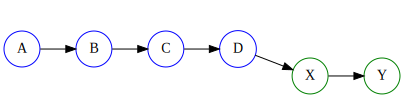

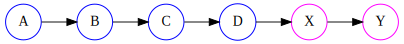

In [44]:
import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
fast_foward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
fast_foward.node('A', shape='circle', label='A', color='blue')
fast_foward.node('B', shape='circle', label='B', color='blue')
fast_foward.node('C', shape='circle', label='C', color='blue')
fast_foward.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
fast_foward.node('X', shape='circle', label='X', color='magenta')
fast_foward.node('Y', shape='circle', label='Y', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
fast_foward.edges(['AB', 'BC', 'CD', 'DX', 'XY'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(fast_foward)

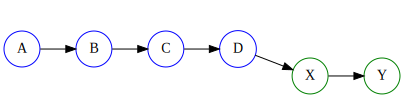

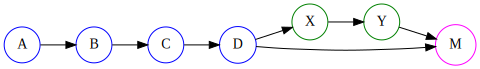

In [45]:
import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
not_fast_forward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
not_fast_forward.node('A', shape='circle', label='A', color='blue')
not_fast_forward.node('B', shape='circle', label='B', color='blue')
not_fast_forward.node('C', shape='circle', label='C', color='blue')
not_fast_forward.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
not_fast_forward.node('X', shape='circle', label='X', color='green')
not_fast_forward.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
not_fast_forward.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
not_fast_forward.edges(['AB', 'BC', 'CD'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])
not_fast_forward.edges(['DX', 'XY', 'YM'])

# Agregar flechas de la rama principal al nodo M
not_fast_forward.edge('D', 'M')

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(not_fast_forward)

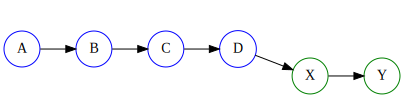

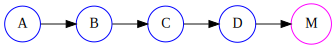

In [46]:
import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
squash = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
squash.node('A', shape='circle', label='A', color='blue')
squash.node('B', shape='circle', label='B', color='blue')
squash.node('C', shape='circle', label='C', color='blue')
squash.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
squash.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
squash.edges(['AB', 'BC', 'CD', 'DM'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(squash)